In [1]:
import datetime as dt
import logging
import os, glob
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr

from IPython.display import HTML

%matplotlib inline

logging.basicConfig(level=logging.INFO)
logging.getLogger("matplotlib").setLevel(logging.WARNING)

In [2]:
from icenet2.model.models import linear_trend_forecast
from icenet2.data.processors.osi import IceNetOSIPreProcessor
from icenet2.plotting.video import xarray_to_video

2022-01-13 21:39:40.259149: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-01-13 21:39:40.259182: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [56]:
ds = xr.DataArray(
    np.zeros((432, 432, 2)),
    dims=("yc", "xc", "time"),
    coords=dict(
        yc=np.arange(0, 432),
        xc=np.arange(0, 432),
        time=pd.date_range(dt.datetime(2000,1,1), 
                           dt.datetime(2000,1,1) + dt.timedelta(days=1))
    )
)

In [72]:
ds[..., -1] = 0.5
pred = linear_trend_forecast(dt.datetime(2000,1,3), ds, np.zeros((432, 432)) == True, 2)[0]

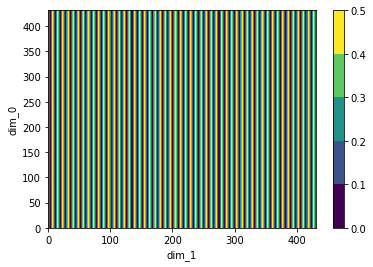

In [73]:
xr.plot.contourf(xr.DataArray(pred))

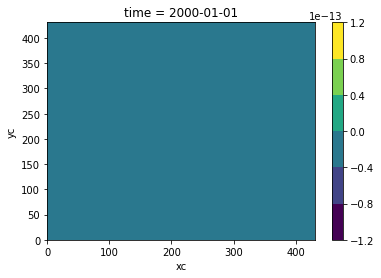

In [60]:
xr.plot.contourf(ds[..., 0])

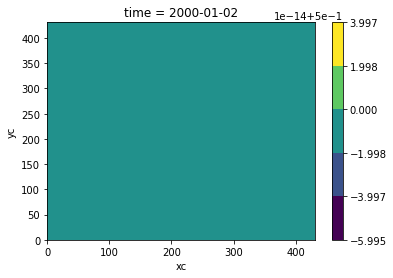

In [61]:
xr.plot.contourf(ds[..., -1])

In [17]:
anim = xarray_to_video(ds, 30)
HTML(anim.to_jshtml())

INFO:root:Inspecting data


AttributeError: 'numpy.float64' object has no attribute 'values'

In [6]:
np.zeros((432, 432)) == True

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])